## 2.1 Representing Tagged Tokens

In [2]:
import nltk
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [3]:
tagged_token[0]

'fly'

In [4]:
tagged_token[1]

'NN'

In [5]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''

In [15]:
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

In [9]:
nltk.help.upenn_tagset('VBD')

VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...


In [10]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [12]:
nltk.help.upenn_tagset('NNS')

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [18]:
nltk.help.upenn_tagset('VBN')

VBN: verb, past participle
    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...


In [19]:
nltk.help.upenn_tagset('WDT')

WDT: WH-determiner
    that what whatever which whichever


## 2.2 Reading Tagged Corpora

In [23]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [24]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [25]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [26]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [27]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [28]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [34]:
#from nltk.corpus import sinica_treebank
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [35]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

## 2.3 A Universal Part-of-Speech Tagset

In [38]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

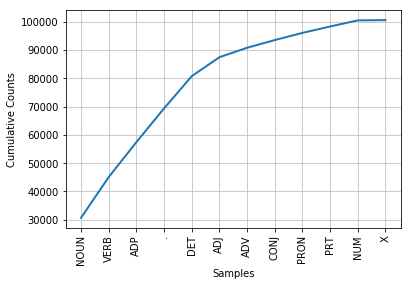

In [39]:
tag_fd.plot(cumulative=True)

In [40]:
# nltk.app.concordance()

# 2.4 Nouns

In [42]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

# 2.5 Verbs

In [43]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


In [44]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [45]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [46]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])

['named',
 'used',
 'caused',
 'exposed',
 'reported',
 'replaced',
 'sold',
 'died',
 'expected',
 'diagnosed',
 'studied',
 'industrialized',
 'owned',
 'found',
 'classified',
 'rejected',
 'outlawed',
 'imported',
 'tracked',
 'thought',
 'considered',
 'elected',
 'based',
 'lifted',
 'ensnarled',
 'voted',
 'been',
 'held',
 'banned',
 'renovated',
 'prolonged',
 'recorded',
 'accumulated',
 'offered',
 'become',
 'guaranteed',
 'proposed',
 'related',
 'improved',
 'worried',
 'cluttered',
 'expedited',
 'retired',
 'ordered',
 'collected',
 'required',
 'received',
 'moved',
 'determined',
 'made',
 'changed',
 'completed',
 'disputed',
 'refunded',
 'estimated',
 'compared',
 'located',
 'filed',
 'scrapped',
 'anticipated',
 'priced',
 'set',
 'applied',
 'existed',
 'incurred',
 'reached',
 'Regarded',
 'paid',
 'trained',
 'instituted',
 'vowed',
 'deemed',
 'combined',
 'removed',
 'concerned',
 'complained',
 'accelerated',
 'believed',
 'called',
 'solved',
 'forgiven',


In [60]:
[ w for w in cfd1.conditions() if 'NOUN' in cfd1[w] and 'VERB' in cfd1[w] ]

['will',
 'publishing',
 'form',
 'show',
 'are',
 'risk',
 'amounts',
 'total',
 'rate',
 'finding',
 'study',
 'contract',
 'support',
 'ban',
 'uses',
 'exhaust',
 'question',
 'place',
 'bearing',
 'work',
 'force',
 'slide',
 'declines',
 'rates',
 'yield',
 'point',
 'thought',
 'sign',
 'can',
 'watch',
 'top',
 'yielding',
 'fund',
 'boosts',
 'share',
 'holding',
 'engineering',
 'controls',
 'acts',
 'issue',
 'borrowing',
 'raise',
 'act',
 'default',
 'marketing',
 'position',
 'time',
 'manufacturing',
 'jet',
 'fall',
 'end',
 'buffet',
 'honor',
 'name',
 'block',
 'return',
 'trade',
 'increase',
 'last',
 'target',
 'forecast',
 'advertising',
 'plan',
 'spending',
 'cost',
 'costs',
 'attempt',
 'decline',
 'drop',
 'matters',
 'use',
 'gains',
 'decrease',
 'offer',
 'move',
 'places',
 'bid',
 'values',
 'demand',
 'operating',
 'raising',
 'matter',
 'factors',
 'might',
 'speed',
 'increases',
 'state',
 'purchase',
 'hopes',
 'review',
 'trading',
 'refund',
 'at

In [54]:
cfd1.conditions()

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.',
 'Mr.',
 'is',
 'chairman',
 'of',
 'Elsevier',
 'N.V.',
 'Dutch',
 'publishing',
 'group',
 'Rudolph',
 'Agnew',
 '55',
 'and',
 'former',
 'Consolidated',
 'Gold',
 'Fields',
 'PLC',
 'was',
 'named',
 '*-1',
 'this',
 'British',
 'industrial',
 'conglomerate',
 'A',
 'form',
 'asbestos',
 'once',
 'used',
 '*',
 'to',
 'make',
 'Kent',
 'cigarette',
 'filters',
 'has',
 'caused',
 'high',
 'percentage',
 'cancer',
 'deaths',
 'among',
 'workers',
 'exposed',
 'it',
 'more',
 'than',
 '30',
 'ago',
 'researchers',
 'reported',
 '0',
 '*T*-1',
 'The',
 'fiber',
 'crocidolite',
 'unusually',
 'resilient',
 'enters',
 'lungs',
 'with',
 'even',
 'brief',
 'exposures',
 'causing',
 'symptoms',
 'that',
 'show',
 'up',
 'decades',
 'later',
 'said',
 '*T*-2',
 'Lorillard',
 'Inc.',
 'unit',
 'New',
 'York-based',
 'Loews',
 'Corp.',
 'ma

In [51]:
cfd2.conditions()

['NNP',
 ',',
 'CD',
 'NNS',
 'JJ',
 'MD',
 'VB',
 'DT',
 'NN',
 'IN',
 '.',
 'VBZ',
 'VBG',
 'CC',
 'VBD',
 'VBN',
 '-NONE-',
 'RB',
 'TO',
 'PRP',
 'RBR',
 'WDT',
 'VBP',
 'RP',
 'PRP$',
 'JJS',
 'POS',
 '``',
 'EX',
 "''",
 'WP',
 ':',
 'JJR',
 'WRB',
 '$',
 'NNPS',
 'WP$',
 '-LRB-',
 '-RRB-',
 'PDT',
 'RBS',
 'FW',
 'UH',
 'SYM',
 'LS',
 '#']

In [55]:
cfd1['Pierre']

FreqDist({'NOUN': 1})

In [62]:
idx1 = wsj.index(('kicked', 'VBD'))

In [63]:
wsj[idx1-4:idx1+1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [64]:
idx2 = wsj.index(('kicked', 'VBN'))

In [65]:
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

In [70]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
cfd2['VN']

FreqDist()

In [69]:
cfd2.conditions()

['NOUN',
 '.',
 'NUM',
 'ADJ',
 'VERB',
 'DET',
 'ADP',
 'CONJ',
 'X',
 'ADV',
 'PRT',
 'PRON',
 'VN']

In [71]:
cfd2['VN']

FreqDist()

In [72]:
cfd2

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'.': FreqDist({'!': 6,
                               '#': 16,
                               '$': 718,
                               "'": 10,
                               "''": 684,
                               ',': 4885,
                               '-': 4,
                               '--': 230,
                               '-LCB-': 14,
                               '-LRB-': 106,
                               '-RCB-': 14,
                               '-RRB-': 112,
                               '.': 3828,
                               '...': 16,
                               ':': 142,
                               ';': 171,
                               '?': 40,
                               'C$': 2,
                               'US$': 4,
                               'Wa': 1,
                               '`': 10,
                               '``': 702}),
                     'ADJ': FreqDi

In [76]:
len(list(cfd2['VERB']))

2633

In [77]:
len(list(cfd2['VN']))

0

In [85]:
[ ( c, len(cfd2[c]) ) for c in cfd2.conditions()]

[('NOUN', 6557),
 ('.', 22),
 ('NUM', 960),
 ('ADJ', 1830),
 ('VERB', 2633),
 ('DET', 47),
 ('ADP', 119),
 ('CONJ', 18),
 ('X', 455),
 ('ADV', 463),
 ('PRT', 21),
 ('PRON', 43),
 ('VN', 0)]

In [87]:
list( [ cfd2[c] for c in cfd2.conditions() if c == 'PRT'] )

[FreqDist({"'": 63,
           "'s": 761,
           'TO': 1,
           'To': 17,
           'about': 3,
           'across': 1,
           'around': 3,
           'away': 4,
           'back': 6,
           'by': 1,
           'down': 14,
           'for': 1,
           'in': 15,
           'off': 27,
           'on': 6,
           'out': 47,
           'over': 7,
           'through': 1,
           'to': 2161,
           'together': 3,
           'up': 77})]

In [88]:
[ cfd2[c] for c in cfd2.conditions() if c == 'PRT']

[FreqDist({"'": 63,
           "'s": 761,
           'TO': 1,
           'To': 17,
           'about': 3,
           'across': 1,
           'around': 3,
           'away': 4,
           'back': 6,
           'by': 1,
           'down': 14,
           'for': 1,
           'in': 15,
           'off': 27,
           'on': 6,
           'out': 47,
           'over': 7,
           'through': 1,
           'to': 2161,
           'together': 3,
           'up': 77})]

In [89]:
idxt = wsj.index(('To', 'PRT'))

In [92]:
wsj[idxt-4:idxt+1]

[('night', 'NOUN'), ('*T*-2', 'X'), ('.', '.'), ('*-1', 'X'), ('To', 'PRT')]

In [93]:
idxa = wsj.index(('about', 'PRT'))
wsj[idxa-4:idxa+1]

[("'s", 'VERB'),
 ('possible', 'ADJ'),
 ('--', '.'),
 ('how', 'ADV'),
 ('about', 'PRT')]

In [103]:
lprt = [ cfd2[c] for c in cfd2.conditions() if c == 'PRT']

In [106]:
prts = [c for c in lprt[0]]

In [109]:
print(prts)

['to', 'up', "'s", 'in', "'", 'down', 'off', 'out', 'together', 'about', 'on', 'To', 'away', 'across', 'over', 'around', 'TO', 'through', 'back', 'for', 'by']


In [110]:
idxf = wsj.index(('for', 'PRT'))
wsj[idxf-4:idxf+1]

[('customer', 'NOUN'),
 ('that', 'ADP'),
 ('banks', 'NOUN'),
 ('pine', 'VERB'),
 ('for', 'PRT')]

In [111]:
idxt = wsj.index(('together', 'PRT'))
wsj[idxt-4:idxt+1]

[('fund', 'NOUN'),
 ('was', 'VERB'),
 ('put', 'VERB'),
 ('*-41', 'X'),
 ('together', 'PRT')]

In [118]:
word_tag_pairs = nltk.bigrams(wsj)
prt_preceders = [a[0] for (a, b) in word_tag_pairs if b[1] == 'PRT']
fdist = nltk.FreqDist(prt_preceders)
[word for (word, _) in fdist.most_common()]

['*-1',
 '*',
 '*-2',
 '*-3',
 'company',
 '%',
 'according',
 '*T*-1',
 '*T*-2',
 'Japan',
 'president',
 ',',
 'nation',
 'year',
 'market',
 'Moody',
 'them',
 'Columbia',
 'country',
 'up',
 'Board',
 'lead',
 'consented',
 'rose',
 'Corp.',
 '*-4',
 'it',
 '3\\/4',
 'government',
 'stock',
 'come',
 'Poor',
 'Street',
 'According',
 '*U*',
 'and',
 'Department',
 'Rally',
 'access',
 'due',
 'managers',
 'subject',
 'cents',
 'investors',
 'not',
 'Co.',
 'administration',
 'back',
 'department',
 'China',
 'firm',
 'payments',
 'Tuesday',
 'Inc.',
 'yesterday',
 'contributed',
 'take',
 'Courter',
 'Containers',
 'Bush',
 'Campbell',
 '*T*-3',
 '1991',
 'today',
 'day',
 'turned',
 'came',
 'response',
 'went',
 'September',
 'Asia',
 'state',
 'addition',
 "''",
 '5\\/8',
 'Weisfield',
 'make',
 'million',
 'Georgia-Pacific',
 'House',
 '1\\/2',
 'Ratners',
 'Marine',
 'Boston',
 'point',
 'fell',
 'off',
 'led',
 'Edison',
 'as',
 'board',
 'Tokyo',
 'put',
 'Chaplin',
 'Lane',